# What we can get with a histogram

## Loading data set as dataframe

In [4]:
from sklearn import datasets
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

binID = np.random.randint(3, size=100)
binID = np.reshape(binID, (len(binID),1))

beta = np.random.randint(3,6,size = 100)
beta = np.reshape(beta, (len(beta),1))

PCC = np.random.uniform(0,1,100)
PCC = np.reshape(PCC, (len(PCC),1))

matrix = np.concatenate([binID, beta, PCC], axis=1)

# For our real data, we need to load each feature as a column 


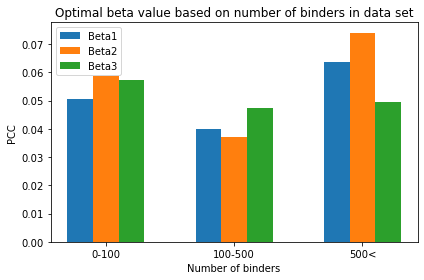

In [5]:
B0 = dict()                       # initialize dict for average PCC for each beta value in each bin
B1 = dict()
B2 = dict()

for i in range(3,6):              # insert values for beta instead of 3 and 6
    B0[i] = 0
    B1[i] = 0
    B2[i] = 0

N = len(matrix)                    # number of alleles

for i in range(N):
    binID = int(matrix[i][0])      # change to column with binders
    betaID = int(matrix[i][1])     # change to column with e.g. beta value
    PCC = matrix[i][2]             # change to column with PCC

    if binID < 1:                  # change to our bin values
        B0[betaID] += PCC
    elif binID < 2:                # bin value here
        B1[betaID] += PCC
    else:
        B2[betaID] += PCC


labels = ['0-100', '100-500','500<']

Beta_1_means = [B0[3]/N, B1[3]/N, B2[3]/N]  # for beta value number 1, insert the means in bin 1, bin 2 and bin 3
Beta_2_means = [B0[4]/N, B1[4]/N, B2[4]/N]
Beta_3_means = [B0[5]/N, B1[5]/N, B2[5]/N]

x = np.arange(len(labels))                  # the label locations
width = 0.2                                 # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, Beta_1_means, width, label='Beta1')
rects2 = ax.bar(x, Beta_2_means, width, label='Beta2')
rects3 = ax.bar(x + width, Beta_3_means, width, label='Beta3')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('PCC')
ax.set_xlabel('Number of binders')
ax.set_title('Optimal beta value based on number of binders in data set')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()

# Trying with tryout data

## Load data

In [8]:
# project code directory
RDIR = '/home/mathias/bioinfo_algos/code/project'

#  project data directory 
DDIR = '/home/mathias/bioinfo_algos/data/project'

df_PSSM = pd.read_csv(RDIR +'/PSSM.tsv', sep="\t") 
PSSM = df_PSSM.values

df_SMM = pd.read_csv(RDIR +'/SMM.tsv', sep="\t") 
SMM = df_SMM.values

df_ANN = pd.read_csv(RDIR +'/ANN.tsv', sep="\t") 
ANN = df_ANN.values


print(PSSM)
print(len(PSSM))

[['A0101' 'PSSM' 0 0 0.2899 1606030.0]
 ['A0101' 'PSSM' 50 0 0.61545 71.3526]
 ['A0101' 'PSSM' 100 0 0.61907 50.0393]
 ...
 ['B5301' 'PSSM' 50 1 0.64327 76.1739]
 ['B5301' 'PSSM' 100 1 0.64129 69.8266]
 ['B5301' 'PSSM' 200 1 0.63884 65.8246]]
280


## Allele dictionary

In [9]:
# Make dictionary of binders 
allel_info = dict()

infile = open(DDIR + '/Allel_Statistics.txt', 'r')

for line in infile:
    allel = line.split()[0]
    n_binders = line.split()[1]
    n_peptides = line.split()[2]
    allel_info[allel] = dict()
    allel_info[allel]['binders'] = n_binders
    allel_info[allel]['peptides'] = n_peptides
    
infile.close()


### PSSM plot

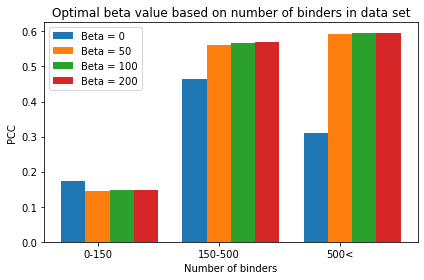

In [11]:
B0_150 = dict()                       # initialize dict for average PCC for each beta value in each bin
B150_500 = dict()
B500 = dict()

B0_150_n = 0                       # initialize dict for average PCC for each beta value in each bin
B150_500_n = 0
B500_n = 0

for i in [0,50,100,200]:              # insert values for beta instead of 3 and 6
    B0_150[i] = 0
    B150_500[i] = 0
    B500[i] = 0

N = len(PSSM)                    # number of alleles

for i in range(N):
    binders = int(allel_info[PSSM[i,0]]['binders']) # determine which bin to put information in
    betaID = int(PSSM[i,2])        # change to column with e.g. beta value
    PCC = PSSM[i,4]            # change to column with PCC

    if binders < 150:                  # change to our bin values
        B0_150[betaID] += PCC
        B0_150_n += 1
    elif binders < 500:                # bin value here
        B150_500[betaID] += PCC
        B150_500_n += 1
    else:
        B500[betaID] += PCC
        B500_n += 1

for i in [0,50,100,200]:    
    B0_150[i] = B0_150[i]/(B0_150_n/4)
    B150_500[i] = B150_500[i]/(B150_500_n/4)
    B500[i] = B500[i]/(B500_n/4)
        
        
        
labels = ['0-150', '150-500','500<']

Beta_1_means = [B0_150[0], B150_500[0], B500[0]]  # for beta value number 1, insert the means in bin 1, bin 2 and bin 3
Beta_2_means = [B0_150[50], B150_500[50], B500[50]] 
Beta_3_means = [B0_150[100], B150_500[100], B500[100]] 
Beta_4_means = [B0_150[200], B150_500[200], B500[200]] 

x = np.arange(len(labels))                  # the label locations
width = 0.2                                 # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width, Beta_1_means, width, label='Beta = 0')
rects2 = ax.bar(x, Beta_2_means, width, label='Beta = 50')
rects3 = ax.bar(x + width, Beta_3_means, width, label='Beta = 100')
rects4 = ax.bar(x + 2*width, Beta_4_means, width, label='Beta = 200')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('PCC')
ax.set_xlabel('Number of binders')
ax.set_title('Optimal beta value based on number of binders in data set')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

fig.tight_layout()

plt.show()